How the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events. 
-	With a focus on how student engagement with online learning platforms relate to different geographic locations, demographics (e.g. race/ethnicity, ESL, learning disabilities), learning context, and socioeconomic status. 


#### 1.	Does a student's ethnicity have any effect on their engagement with online learning platforms? 

#### Data

Tell us (at least approximately) how large your dataset is (focus on the dataset(s) that contain the variables that you will use in your analysis, you don't need to use all the files provided.)
-    How was the data collected? Is there any part of the data collection process that affects your analysis?
-    Comment on the cleanliness of the data. Are there missing values? Will you have to do any data cleaning or transformation to conduct your analysis
-    Are there any variables not present in the dataset that would be nice to have?


#### Districts_info.csv (Kaggle):

Size of the Dataset:
-	(233, 7). 233 rows and 7 columns
Cleanliness of Data:
-	It contains 442 NaN values, brackets are formatted incorrectly, there are missing state (the state is nan), there are are missing locale values (locale is nan)

Variables not present:
-	Districts datasets only includes 24 states, which is 26 states less than the amount of states in the US. 


#### Products_info.csv (Kaggle):

Size of the Data Set:
-	(372, 6). 372 rows and 6 columns
Cleanliness of the Data:
-	Generally clean, still contains some NaN values (41 NaN values). However, information included seem to be mostly relevant, and are highly concentrated in kindergarten education
Variables Missing:
-	No noticeable variables are missing from the dataset, it should be used later on to combine it with both the Engagement Dataset, and the District Dataset.


#### Internet Connection by Country (FCC):

Size of the Data:
-	(67909, 8). 67,909 rows and 8 columns

Cleanliness of the Data:
-	Clean, no missing values, spelling errors.
-	Has data on all 50 states in the US 

Variables Missing:
-	No noticeable variables are missing


#### Engagement Data (Kaggle):

Size of the Data
-	(500,00+, 4). 500,000+ rows and 4 columns
-	Very Large Dataset

Cleanliness of the Data
-	Not clean, a lot of missing values in the engagement index

Variables Missing
-	It is a very large dataset, and the dataset needs to be combined with other datasets in order to give any sort of information. The engagement data adds on to the product and district info dataset.

One problem that may affect us in this project is the date when the Districts_info was taken before the pandemic started, this information may have changed drastically due to covid-19, connections may have improved as most of the stuff was now being done online.\

Variables that would be nice to have:
-	Percentage of other minorities 


#### Visualizations

1. Engagement: To analyze engagement, we have two main variables, the percentage of page load events students have for a particular product and the total number of page load events students have for a particular product on a given day. We can use line charts to visualize the trends and direction of student engagement with various types of software or products from January 1, 2020 to December 31, 2020 for the different school district.

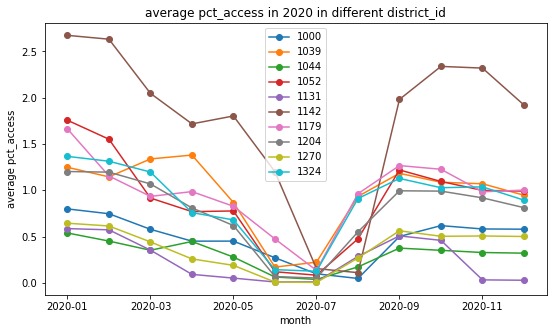

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
engagements = []
engagement_folder = 'engagement_data'
for filename in os.listdir(engagement_folder):
    if filename.endswith('csv'):
        district_id = int(filename.split('.')[0])
        df = pd.read_csv(os.path.join(engagement_folder, filename))
        df = df.assign(district_id = [district_id]*df.shape[0])
        df['time'] = df['time'].astype('datetime64')
        df['month'] = df['time'].apply(lambda x: datetime.strftime(x, '%Y-%m'))
        engagements.append(df)
products_info = pd.read_csv('products_info.csv')
districts_info = pd.read_csv('districts_info.csv')
products_info.rename(columns = {'LP ID': 'lp_id'}, inplace = True) #rename to lp_id for merge with engagement_data
dfs = []
for df in engagements:
    df1 = pd.merge(df, products_info)
    dfs.append(pd.merge(df1, districts_info))
merged_df = pd.concat(dfs)
for df in engagements[0:10]:
    label = df['district_id'].head(1).values[0]
    df = df.groupby('month')['pct_access'].mean()
    title = 'average pct_access in 2020 in different district_id'
    df.plot(marker = 'o', ylabel='average pct_access', label = label, title = title, figsize=(9, 5))
plt.legend()
plt.show()


2. Products information:
a)	For product name a bar chart can be used to depict which product choice is most popular amongst the students and the mode can be the summary statistic used.

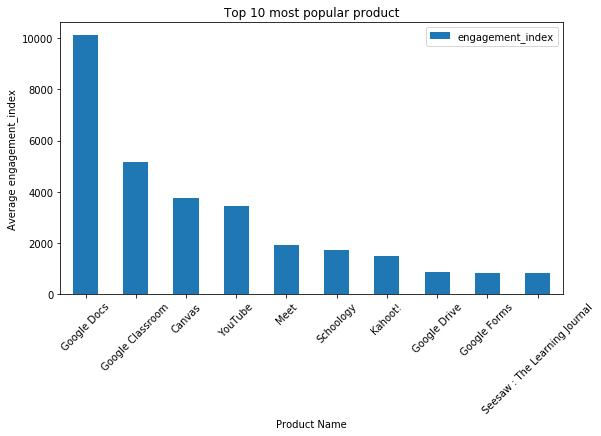

In [6]:
df = merged_df.groupby('Product Name')['engagement_index'].mean().sort_values(ascending=False).head(10)
title = 'Top 10 most popular product'
df.plot(kind = 'bar', figsize=(9, 5), title = title, ylabel='Average engagement_index', rot=45)
plt.legend()
plt.show()


b)	For sectors a bar chart can be created to visually depict the number of students in each PreK level whether it be higher education or corporate. This will help to determine which PreK level is largest. This summary statistic which can be used is the mode.

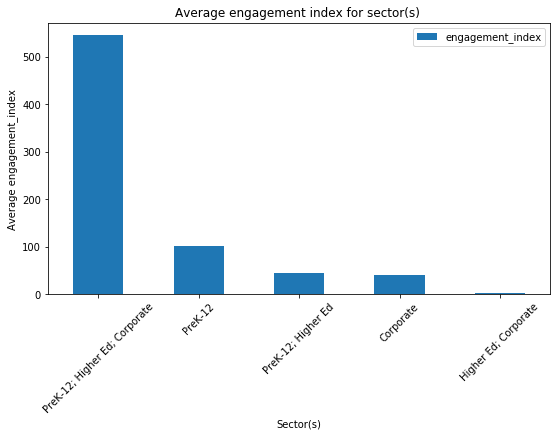

In [7]:
df = merged_df.groupby('Sector(s)')['engagement_index'].mean().sort_values(ascending=False)
title = 'Average engagement index for sector(s) '
df.plot(kind = 'bar', figsize=(9, 5), title = title, ylabel='Average engagement_index', rot=45)
plt.legend()
plt.show()


c)	For primary essential function we can use a scatter plot to assess the level the student is at and what their main functions are for the engagement of online learning platforms.

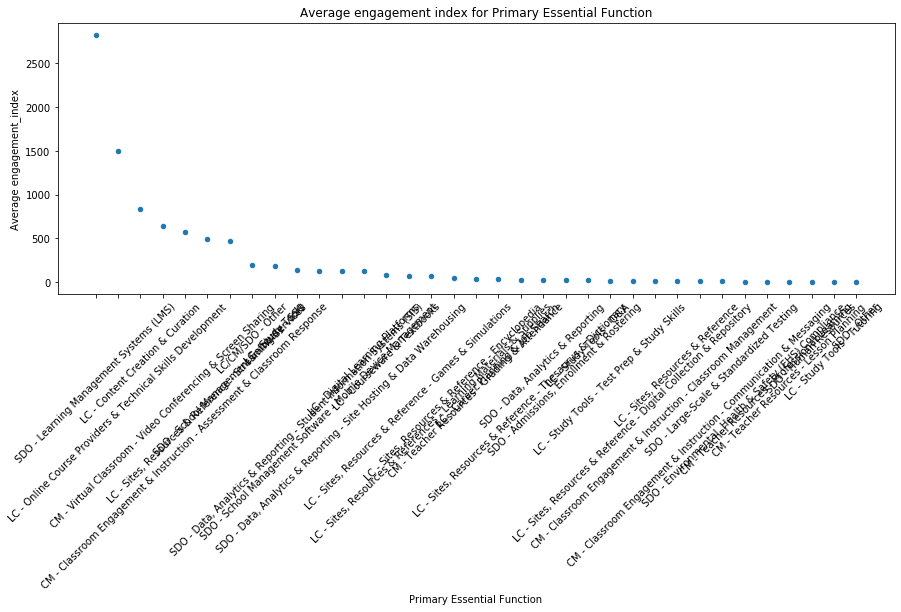

In [8]:
df = merged_df.groupby('Primary Essential Function')['engagement_index'].mean().sort_values(ascending=False)
df = df.reset_index()
title = 'Average engagement index for Primary Essential Function'
df.plot(x='Primary Essential Function', y='engagement_index', kind = 'scatter', figsize=(15, 5), title = title, ylabel='Average engagement_index', rot=45)
plt.show()


#### Districts information:

a)	District, state, locate: For school districts and the states in which they are located, we can visualize the distribution of participation across school districts and geographic locations by using boxplots or histograms

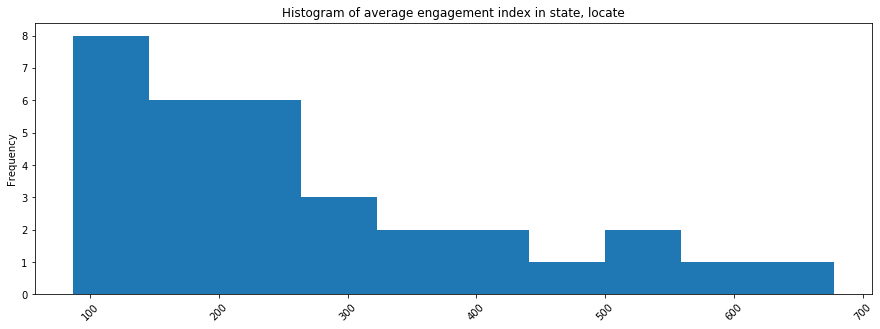

In [9]:
df = merged_df.groupby(['state', 'locale'])['engagement_index'].mean().sort_values(ascending=False)
title = 'Histogram of average engagement index in state, locate'
df.plot(kind = 'hist', figsize=(15, 5), title = title, ylabel='Average engagement_index', rot=45)
plt.show()


b)	pct_black/hispanic, pct_free/reduced: The percentage of students who identify as Black or Hispanic by district, and the percentage of students eligible for free or reduced lunch by district, can also be visualized and categorized by box plot.

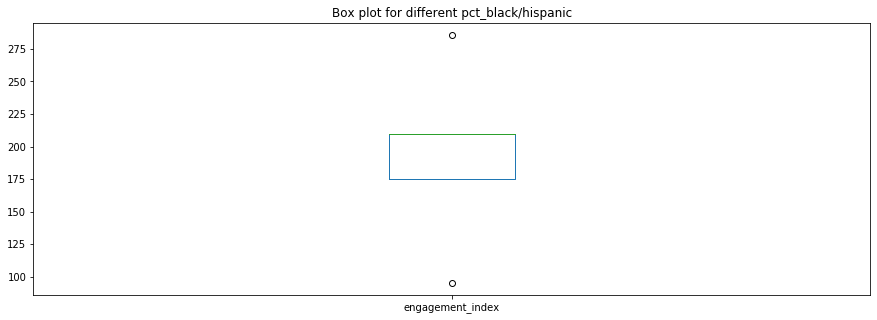

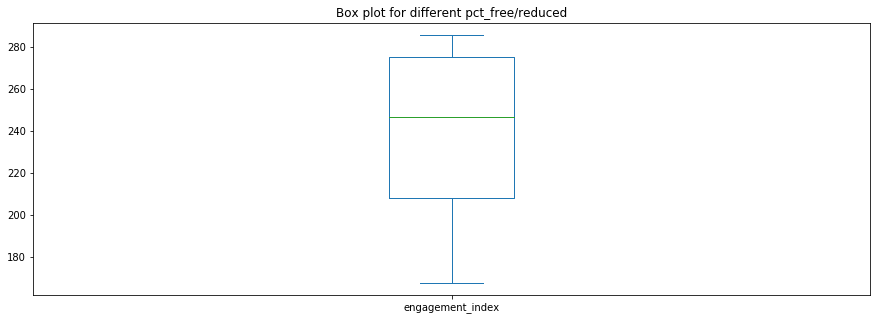

In [10]:
df = merged_df.groupby('pct_black/hispanic')['engagement_index'].mean()
title = 'Box plot for different pct_black/hispanic'
df.plot(kind = 'box', figsize=(15, 5), title = title)
df = merged_df.groupby('pct_free/reduced')['engagement_index'].mean()
plt.figure()
title = 'Box plot for different pct_free/reduced'
df.plot(kind = 'box', figsize=(15, 5), title = title)
plt.show()

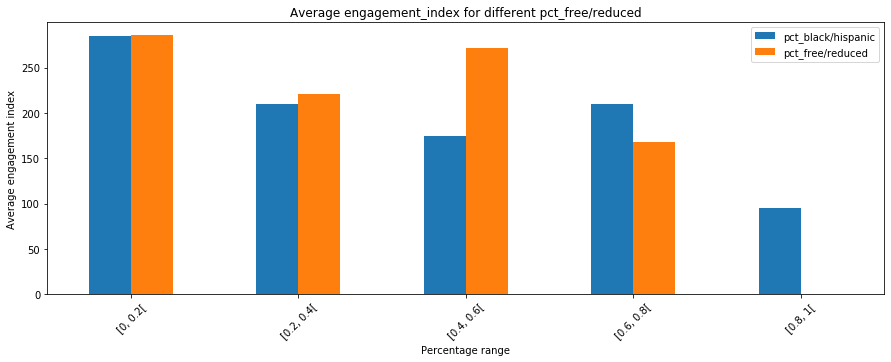

In [11]:
s1 = merged_df.groupby('pct_black/hispanic')['engagement_index'].mean()
s2 = merged_df.groupby('pct_free/reduced')['engagement_index'].mean()
if '[0.8, 1[' not in s2:
    s2['[0.8, 1['] = 0
df = pd.DataFrame({'pct_black/hispanic': s1.values, 'pct_free/reduced': s2.values}, index = s1.index)
title = 'Average engagement_index for different pct_free/reduced'
df.plot(kind = 'bar', figsize=(15, 5), title = title, rot = 45)
plt.ylabel('Average engagement index')
plt.xlabel('Percentage range')
plt.legend()
plt.show()

c)	county _connections_ratio: we can use histogram to show the distribution of county_connections_ration across state and locations, or use scatter plot to show the relationship between county_connections_ratio and other variables to identify correlations.Summary statistics include mean, median, range.

Summary statistics:
                              count        mean          std   min    25%  \
county_connections_ratio                                                    
[0.18, 1[                 2313251.0  257.788083  2156.835818  0.02   0.98   
[1, 2[                       1204.0  502.671146  1819.822697  3.36  10.07   

                             50%       75%        max  
county_connections_ratio                               
[0.18, 1[                  5.160   33.9300  142206.77  
[1, 2[                    37.605  242.5275   27914.97  


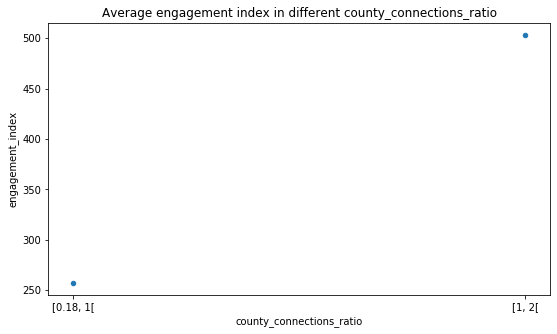

In [13]:
print('Summary statistics:')
print(merged_df.groupby('county_connections_ratio')['engagement_index'].describe())
df = merged_df.groupby('county_connections_ratio')['engagement_index'].mean()
df = df.reset_index()
title = 'Average engagement index in different county_connections_ratio'
df.plot(kind = 'scatter', x='county_connections_ratio', y='engagement_index', title = title, figsize=(9, 5))


d)	Pp_total raw: can be visualized by box chart to show the median, quartiles of per-pupil total expenditure,
or use histogram to show the distribution of per-pipil toral expenditures across school districts.
Summary statistics may include mean, median range of per-pupli total expenditures.

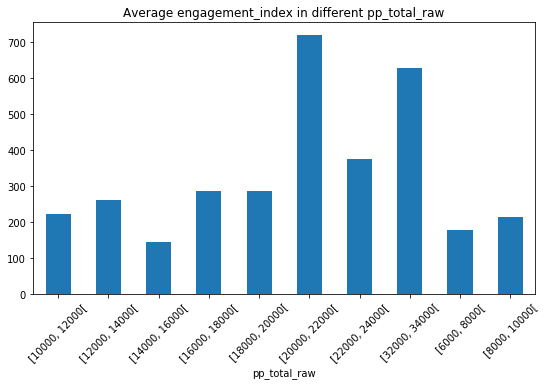

In [14]:
df = merged_df.groupby('pp_total_raw')['engagement_index'].mean()
df.plot(kind = 'bar', rot = 45, figsize=(9, 5), title = 'Average engagement_index in different pp_total_raw')


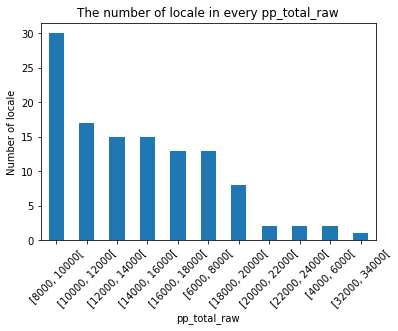

In [15]:
s = districts_info.groupby('pp_total_raw')['locale'].count()
s = s.sort_values(ascending = False)
s.plot(kind = 'bar', rot = 45, title = 'The number of locale in every pp_total_raw', ylabel='Number of locale')


####     4.	Country Connection Information:

a)	Because the dataset is county specific, we can use "countyname" variable to narrow in and find ethnic data and correlate it with internet connection. We can summarise the overall connection rates with summary statistics like mean, and barplots to get a good idea of ethnicity and internet conenction

The number of locale in different county_connections_ratio:
county_connections_ratio
[0.18, 1[    161
[1, 2[         1
Name: locale, dtype: int64


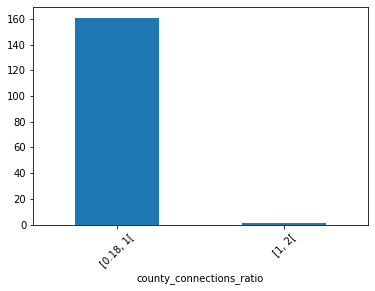

In [16]:
s = districts_info.groupby('county_connections_ratio')['locale'].count()
print('The number of locale in different county_connections_ratio:')
print(s)
s.plot(kind = 'bar', rot = 45)


b)	We can correlate the popularity of a certain product in products_info, with how many people are connected within a certain state, and gather their engagement rates to understand whether certain products gain higher engagement rates depending on the amount of people connected to the internet. We can use pie charts to determine products that dominate areas that have high/low internet connection rates.

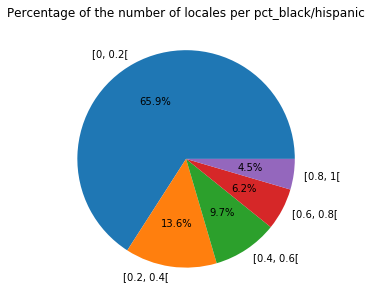

In [17]:
s = districts_info.groupby('pct_black/hispanic')['locale'].count()
title = 'Percentage of the number of locales per pct_black/hispanic'
s.plot(kind = 'pie', autopct='%1.1f%%', ylabel = '', figsize=(9, 5), title = title)


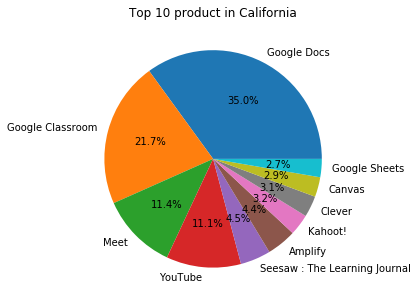

In [18]:
# get one state
merged_df.groupby('state')['engagement_index'].count().sort_values(ascending = False)
df = merged_df[merged_df['state'] == 'California']
df = df.groupby('Product Name')['engagement_index'].mean()
df = df.sort_values(ascending = False).head(10)
df.plot(kind = 'pie', autopct='%1.1f%%', ylabel = '', figsize=(9, 5), title = 'Top 10 product in California')
